#Business Understanding

Cardiovascular desease (CVD) atau penyakit kardiovaskuler merupakan salah satu penyebab kematian nomor satu secara global. Diestimasikan telah merenggut nyawa sekitar 18 juta jiwa setiap tahunnya atau 31% dari seluruh penyebab kematian secara global. <br>
Dimana Empat dari lima kematian CVD diakibatkan oleh serangan jantung dan stroke, dan sepertiganya dialami secara prematur oleh sesorang dengan usia di bawah 70 tahun.
Kegagalan jantung merupakan salah salah penyebab umum dari penyakit kardiovaskuler. <br>


Sebagai seorang
associate data scientist, saya ditugaskan untuk melakukan prediksi terhadap kemungkinan terjadinya penyakit
jantung. Diharapkan pemodelan yang dihasilkan dapat membantu kinerja dokter dalam mendeteksi pasien dengan
penyakit jantung, sehingga dapat menolong lebih banyak orang yang berisiko tinggi terkena penyakit
kardiovaskuler.

## Tujuan Teknis

* Membuat model klasifikasi menggunakan decision tree dan satu model pilihan lainnya, untuk memprediksi apakah seorang pasien mengidap penyakit jantung atau tidak
* Mengevaluasi model (Metrik kesuksesan: Accuracy >70%)
* Menginterpretasikan fitur-fitur yang paling berpengaruh dalam prediksi.

# Import Library

In [1]:
# Basic lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# Preprocessing lib
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Modeling lib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Eval lib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Additional Lib
from sklearn import tree

# Just an option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


#1.&nbsp;Load Dataset

Dataset yang digunakan merupakan data sekunder berupa dataset heart.csv yang bersumber dari Github penyedia sertifikasi.

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sertifikasi BNSP/Heart CVD/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


##1.1 Data Description

1. Age: Usia pasien dalam tahun
2. Sex: Jenis kelamin pasien
  * M: Laki-laki
  * F: Perempuan
3. ChestPainType: Jenis nyeri dada
  * TA: Typical angina (Hebat)
  * ATA: Atypical angina (Signifikan)
  * NAP: Non-anginal pain (Ringan)
  * ASY: Asymptomatic (Tidak Ada)
4. RestingBP: Tekanan darah saat istirahat (mm Hg)
5. Cholesterol: Kadar kolesterol pasien (mm/dl)
6. FastingBS: Gula darah puasa
  * 1: Gula darah puasa > 120 mg/dl
  * 0: Gula darah puasa < 120 mg/dl
7. RestingECG: Hasil elektrokardiogram saat istirahat
  * Normal: Normal
  * ST: ST-T wave abnormality (Abnormal)
  * LVH: Left Ventricular Hypertrophy (Hypertrofi Ventrikel)
8. MaxHR: Detak jantung maksimal yang dicapai (60 - 202)
9. ExerciseAngina: Nyeri dada akibat Latihan fisik
  * N: Tidak
  * Y: Ya
10. Oldpeak: Depresi ST yang diakibatkan oleh latihan saat istirahat
11. ST_Slope: Kemiringan segmen ST saat puncak latihan
  * Up: Upsloping
  * Flat: Flat
  * Down: Downsloping
12. HeartDisease: Output Class
  * 1: Penyakit Jantung
  * 0: Normal



#2.&nbsp;Exploratory Data Analysis

Exploratory Data Analysis (EDA) dilakukan untuk memahami karakteristik, struktur, pola, tren, maupun anomali data

In [3]:
df.shape

(918, 12)

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [6]:
df.nunique()

Age                57
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

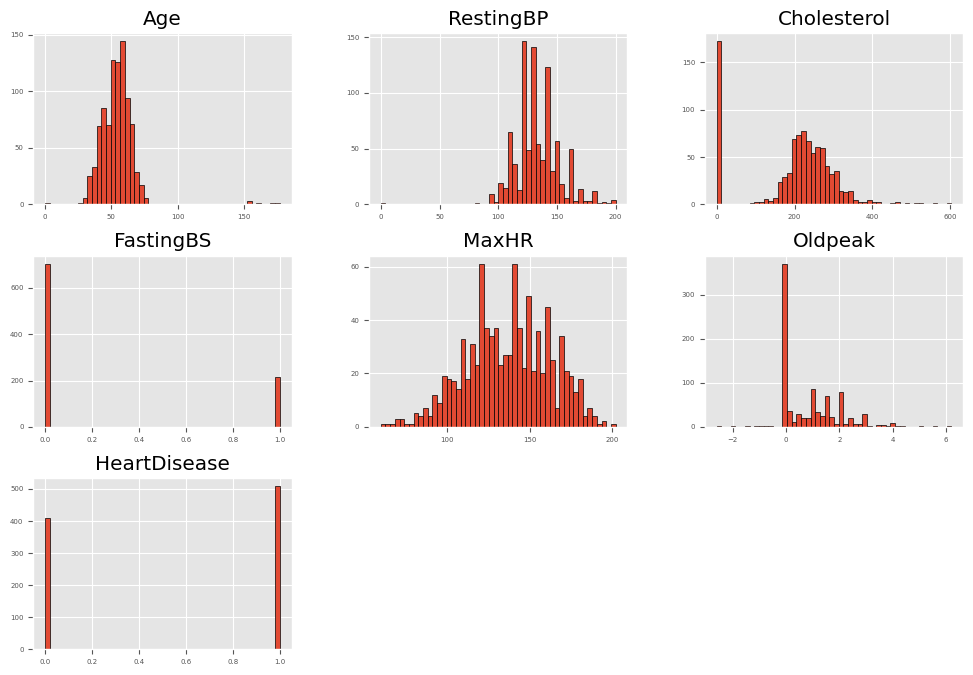

In [7]:
# Data Distribution
df_num = df.select_dtypes(include='number')
fig = df_num.hist(figsize=(12, 8), bins=50, ylabelsize = 5, xlabelsize = 5, edgecolor = 'black')

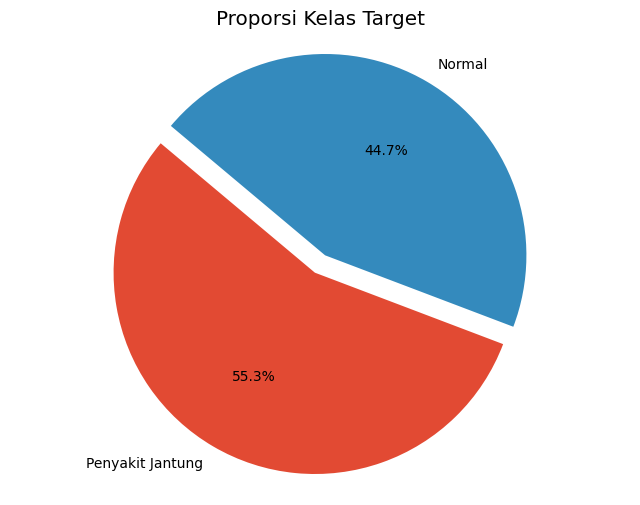

In [8]:
label_counts = df['HeartDisease'].value_counts()
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=['Penyakit Jantung', 'Normal'], autopct='%1.1f%%', explode=explode, startangle=140)
plt.title('Proporsi Kelas Target')
plt.axis('equal')
plt.show()

In [9]:
label_counts = df['HeartDisease'].value_counts()
label_counts

HeartDisease
1    508
0    410
Name: count, dtype: int64

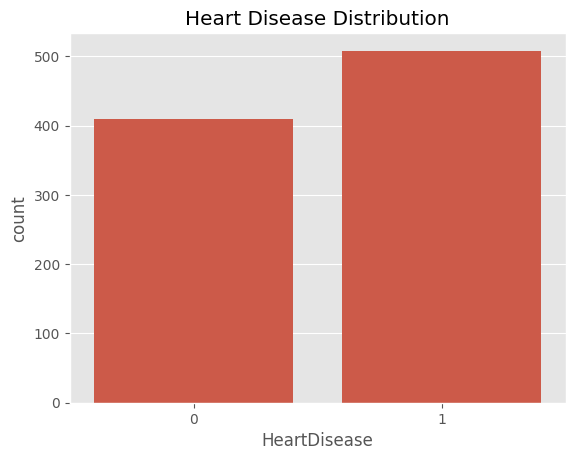

In [10]:
sns.countplot(x='HeartDisease', data=df)
plt.title('Heart Disease Distribution')
plt.show()

In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,911.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,12.988393,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
dup = df.duplicated().sum()
print(f"Terdapat {dup} data duplikat")

Terdapat 0 data duplikat


In [13]:
df.isnull().sum()

Age                7
Sex               10
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64

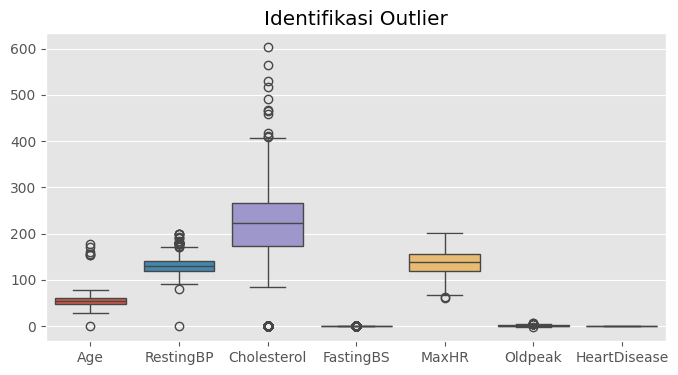

Age: 7 outlier (lower: 1, upper: 6)
RestingBP: 28 outlier (lower: 2, upper: 26)
Cholesterol: 183 outlier (lower: 172, upper: 11)
FastingBS: 214 outlier (lower: 0, upper: 214)
MaxHR: 2 outlier (lower: 2, upper: 0)
Oldpeak: 16 outlier (lower: 1, upper: 15)
HeartDisease: 0 outlier (lower: 0, upper: 0)


In [14]:
num_list = df.select_dtypes(include='number').columns.tolist()

def calculate_outliers(df, col, limits):
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr_val = q3 - q1
    lower_bound = q1 - limits * iqr_val
    upper_bound = q3 + limits * iqr_val
    lower_outliers = (df[col] < lower_bound).sum()
    upper_outliers = (df[col] > upper_bound).sum()
    total_outliers = lower_outliers + upper_outliers
    return lower_outliers, upper_outliers, total_outliers

def get_outliers(df, cols, limits):
    outliers_info = {}
    for col in cols:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            lower_outliers, upper_outliers, total_outliers = calculate_outliers(df, col, limits)
            outliers_info[col] = {
                'lower_outliers': lower_outliers,
                'upper_outliers': upper_outliers,
                'total_outliers': total_outliers
            }
        else:
            print(f"Kolom '{col}' tidak ditemukan atau bukan numerik.")
    return outliers_info

plt.figure(figsize=(8, 4))
sns.boxplot(data=df[num_list])
plt.title('Identifikasi Outlier')
plt.show()

outliers_info = get_outliers(df, num_list, 1.5)
for col, info in outliers_info.items():
    print(f"{col}: {info['total_outliers']} outlier (lower: {info['lower_outliers']}, upper: {info['upper_outliers']})")

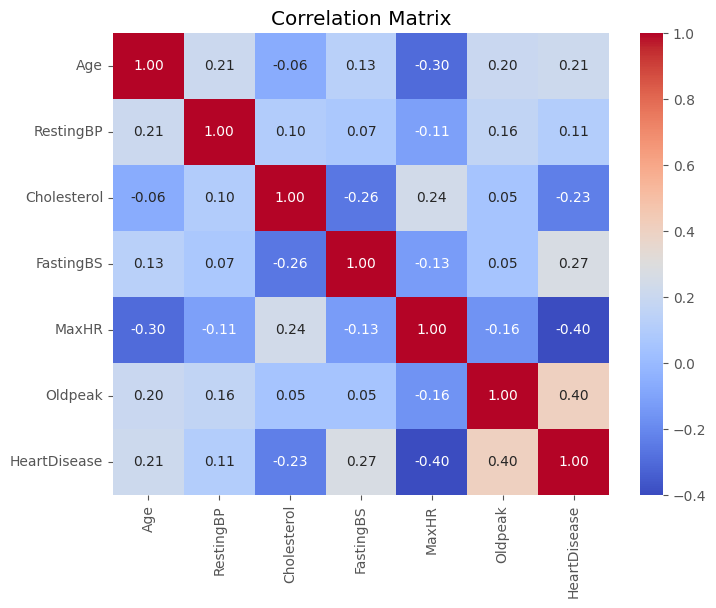

In [15]:
corr = df_num.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##2.1 Insight

Exploratory Data Analysis menghasilkan:
1. Dataset terdiri dari 12 fitur dengan 918 baris
2. Terdapat 2 jenis variabel <br>
  a. Numerik (7) <br>
  * Age
  * RestingBp
  * Cholesterol
  * FastingBS
  * MaxHR
  * Oldpeak
  * HeartDisease
  
  b. Kategorikal (5)
  * Sex
  * ChestPainType
  * RestingECG
  * ExcerciseAngina
  * ST_Slope

3. Keseluruhan distribusi data adalah normal
4. Proporsi kelas seimbang
  * Normal: 44.7%
  * Penyakit jantung: 55.3%
6. Berdasarkan statistik dekriptif didapati:
  * Rata-rata usia pasien 54
  * Rata-rata tekanan darah saat istirahat 132 mm Hg
  * Rata-rata kadar kolesterol 199 mg/dl
  * Rata-rata gula darah puasa 0.23
  * Rata-rata detak jantung maksimal yang dicapai 137
  * Rata-rata depresi ST yang diakibatkan latihan saat istirahat 0.89
  * Rata-rata heart disease 0.55, yang berarti sekitar 55% dari sampel memiliki penyakit jantung.
7. Tidak Terdapat data duplikat
8. Terdapat Missing value
  * Age: 7
  * Sex: 10
9. Terdapat Data outlier
  * Age: 7 outlier (lower: 1, upper: 6)
  * RestingBP: 28 outlier (lower: 2, upper: 26)
  * Cholesterol: 183 outlier (lower: 172, upper: 11)
  * FastingBS: 214 outlier (lower: 0, upper: 214)
  * MaxHR: 2 outlier (lower: 2, upper: 0)
  * Oldpeak: 16 outlier (lower: 1, upper: 15)
  * HeartDisease: 0 outlier (lower: 0, upper: 0)
10. Correlation Matrix
  * Age
  Terdapat korelasi positif yang lemah antara usia dan penyakit jantung, menunjukkan bahwa semakin tua seseorang, kemungkinan terkena penyakit jantung akan meningkat.
  * RestingBP
  Terdapat korelasi positif yang sangat lemah antara tekanan darah istirahat dan penyakit jantung.
  * Cholesterol
  Terdapat korelasi negatif yang lemah antara kadar kolesterol dan penyakit jantung, yang mungkin menunjukkan bahwa kadar kolesterol yang lebih tinggi tidak selalu berhubungan dengan peningkatan risiko penyakit jantung.
  * FastingBS
  Terdapat korelasi positif yang lemah antara kadar gula darah puasa dan penyakit jantung.
  * MaxHr
  Terdapat korelasi negatif yang moderat antara denyut jantung maksimal dan penyakit jantung, menunjukkan bahwa pasien dengan denyut jantung maksimal yang lebih tinggi cenderung memiliki risiko penyakit jantung yang lebih rendah.
  * Oldpeak
  Terdapat korelasi positif yang moderat antara oldpeak (depresi ST setelah latihan) dan penyakit jantung, menunjukkan bahwa peningkatan oldpeak berkaitan dengan peningkatan risiko penyakit jantung.


#3.&nbsp;Data Preprocessing

Data Preprocessing dilakukan untuk meningkatkan kualitas data sehingga model yang dibangun dapat memberikan hasil yang lebih akurat dan dapat diandalkan

##3.1 Missing Value Handling

Berdasarkan EDA diketahui terdapat Missing Value pada Age dan Sex sehingga perlu ditangani menggunakan teknik Imputasi
* Median Imputation: Mengimputasi missing value menggunakan nilai tengah untuk fitur numerik (Age)
* Mode Imputation: Mengimputasi missing value menggunakan nilai modus untuk fitur kategorikal (Sex)

In [16]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Sex'].fillna(df['Sex'].mode()[0], inplace=True)

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

##3.2 Data Outlier Handling

Data Outlier perlu ditangani guna memastikan hasil analisis yang lebih akurat dan konsisten.

Penanganan Outlier menggunakan teknik Winsorization yaitu dengan mengganti outlier dengan nilai upper & lower bound IQR untuk memastikan semua data tetap ada dalam dataset.

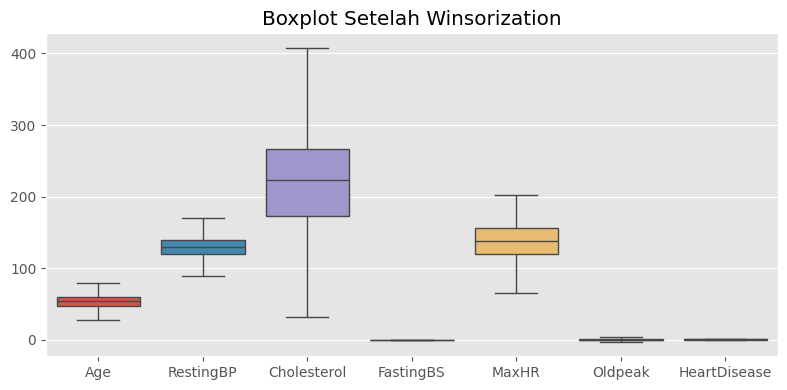

In [17]:
def winsorize(df, cols, limits):
    for col in cols:
        q1, q3 = df[col].quantile([0.25, 0.75])
        iqr_val = q3 - q1
        lower_bound = q1 - limits * iqr_val
        upper_bound = q3 + limits * iqr_val
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

df_clean = winsorize(df, num_list, 1.5)

plt.figure(figsize = (8,4))
sns.boxplot(data=df_clean[num_list])
plt.title('Boxplot Setelah Winsorization')

plt.tight_layout()
plt.show()

In [18]:
df_clean.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54.0,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


##3.3 Feature Engineering

Feature Engineering dilakukan untuk memberikan representasi data yang lebih informatif dan relevan bagi model

###3.3.1 Data Encoding

Diketahui terdapat 5 fitur kategorial sehingga diperlukan data encoding
menggunakan LabelEncoder untuk mengubah fitur kategorikal menjadi representasi numerik yang dapat diproses oleh model

In [19]:
encoder = LabelEncoder()
categorical_cols = df_clean.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df_clean[col] = encoder.fit_transform(df_clean[col])

print("Data Setelah Transformasi:")
df_clean.head()

Data Setelah Transformasi:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54.0,1,1,140,289.0,0,1,172,0,0.0,2,0
1,49.0,0,2,160,180.0,0,1,156,0,1.0,1,1
2,37.0,1,1,130,283.0,0,2,98,0,0.0,2,0
3,48.0,0,0,138,214.0,0,1,108,1,1.5,1,1
4,54.0,1,2,150,195.0,0,1,122,0,0.0,2,0


###3.3.2 Data Normalization

Data memiliki skala yang tidak seragam, sehingga diperlukan normalisasi menggunakan MinMaxScaler untuk memastikan bahwa setiap fitur memiliki rentang nilai yang seragam dan tidak ada yang mendominasi antar fitur.

In [20]:
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

print("Data Setelah Min-Max Scaling:")
df_clean.head()

Data Setelah Min-Max Scaling:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.509615,1.0,0.333333,0.625,0.683667,0.0,0.5,0.779412,0.0,0.375000,1.0,0.0
1,0.413462,0.0,0.666667,0.875,0.393000,0.0,0.5,0.661765,0.0,0.541667,0.5,1.0
2,0.182692,1.0,0.333333,0.500,0.667667,0.0,1.0,0.235294,0.0,0.375000,1.0,0.0
3,0.394231,0.0,0.000000,0.600,0.483667,0.0,0.5,0.308824,1.0,0.625000,0.5,1.0
4,0.509615,1.0,0.666667,0.750,0.433000,0.0,0.5,0.411765,0.0,0.375000,1.0,0.0


#4.&nbsp;Modeling

Splitting Dataset dengan rasio 8:2 (80% train & 20% test)

In [21]:
X = df_clean.drop('HeartDisease', axis=1)
y = df_clean['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##4.1 Decision Tree

Pembuatan model Decision Tree dengan menerapkan GridSearchCV untuk menentukan parameter terbaik

In [22]:
dt_model = DecisionTreeClassifier(random_state=42, criterion='gini')

dt_param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

dt_cv = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, scoring='accuracy')
dt_cv.fit(X_train, y_train)

print(f"Decision Tree Best Parameters: {dt_cv.best_params_}")

Decision Tree Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [23]:
best_dt = dt_cv.best_estimator_
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

[Text(0.5, 0.875, 'ST_Slope <= 0.75\ngini = 0.496\nsamples = 734\nvalue = [333, 401]\nclass = Heart Disease'),
 Text(0.25, 0.625, 'ChestPainType <= 0.167\ngini = 0.305\nsamples = 427\nvalue = [80, 347]\nclass = Heart Disease'),
 Text(0.125, 0.375, 'Sex <= 0.5\ngini = 0.177\nsamples = 296\nvalue = [29, 267]\nclass = Heart Disease'),
 Text(0.0625, 0.125, 'gini = 0.387\nsamples = 42\nvalue = [11, 31]\nclass = Heart Disease'),
 Text(0.1875, 0.125, 'gini = 0.132\nsamples = 254\nvalue = [18, 236]\nclass = Heart Disease'),
 Text(0.375, 0.375, 'Sex <= 0.5\ngini = 0.475\nsamples = 131\nvalue = [51, 80]\nclass = Heart Disease'),
 Text(0.3125, 0.125, 'gini = 0.366\nsamples = 29\nvalue = [22, 7]\nclass = Normal'),
 Text(0.4375, 0.125, 'gini = 0.407\nsamples = 102\nvalue = [29, 73]\nclass = Heart Disease'),
 Text(0.75, 0.625, 'Cholesterol <= 0.07\ngini = 0.29\nsamples = 307\nvalue = [253, 54]\nclass = Normal'),
 Text(0.625, 0.375, 'Oldpeak <= 0.417\ngini = 0.43\nsamples = 32\nvalue = [10, 22]\nclas

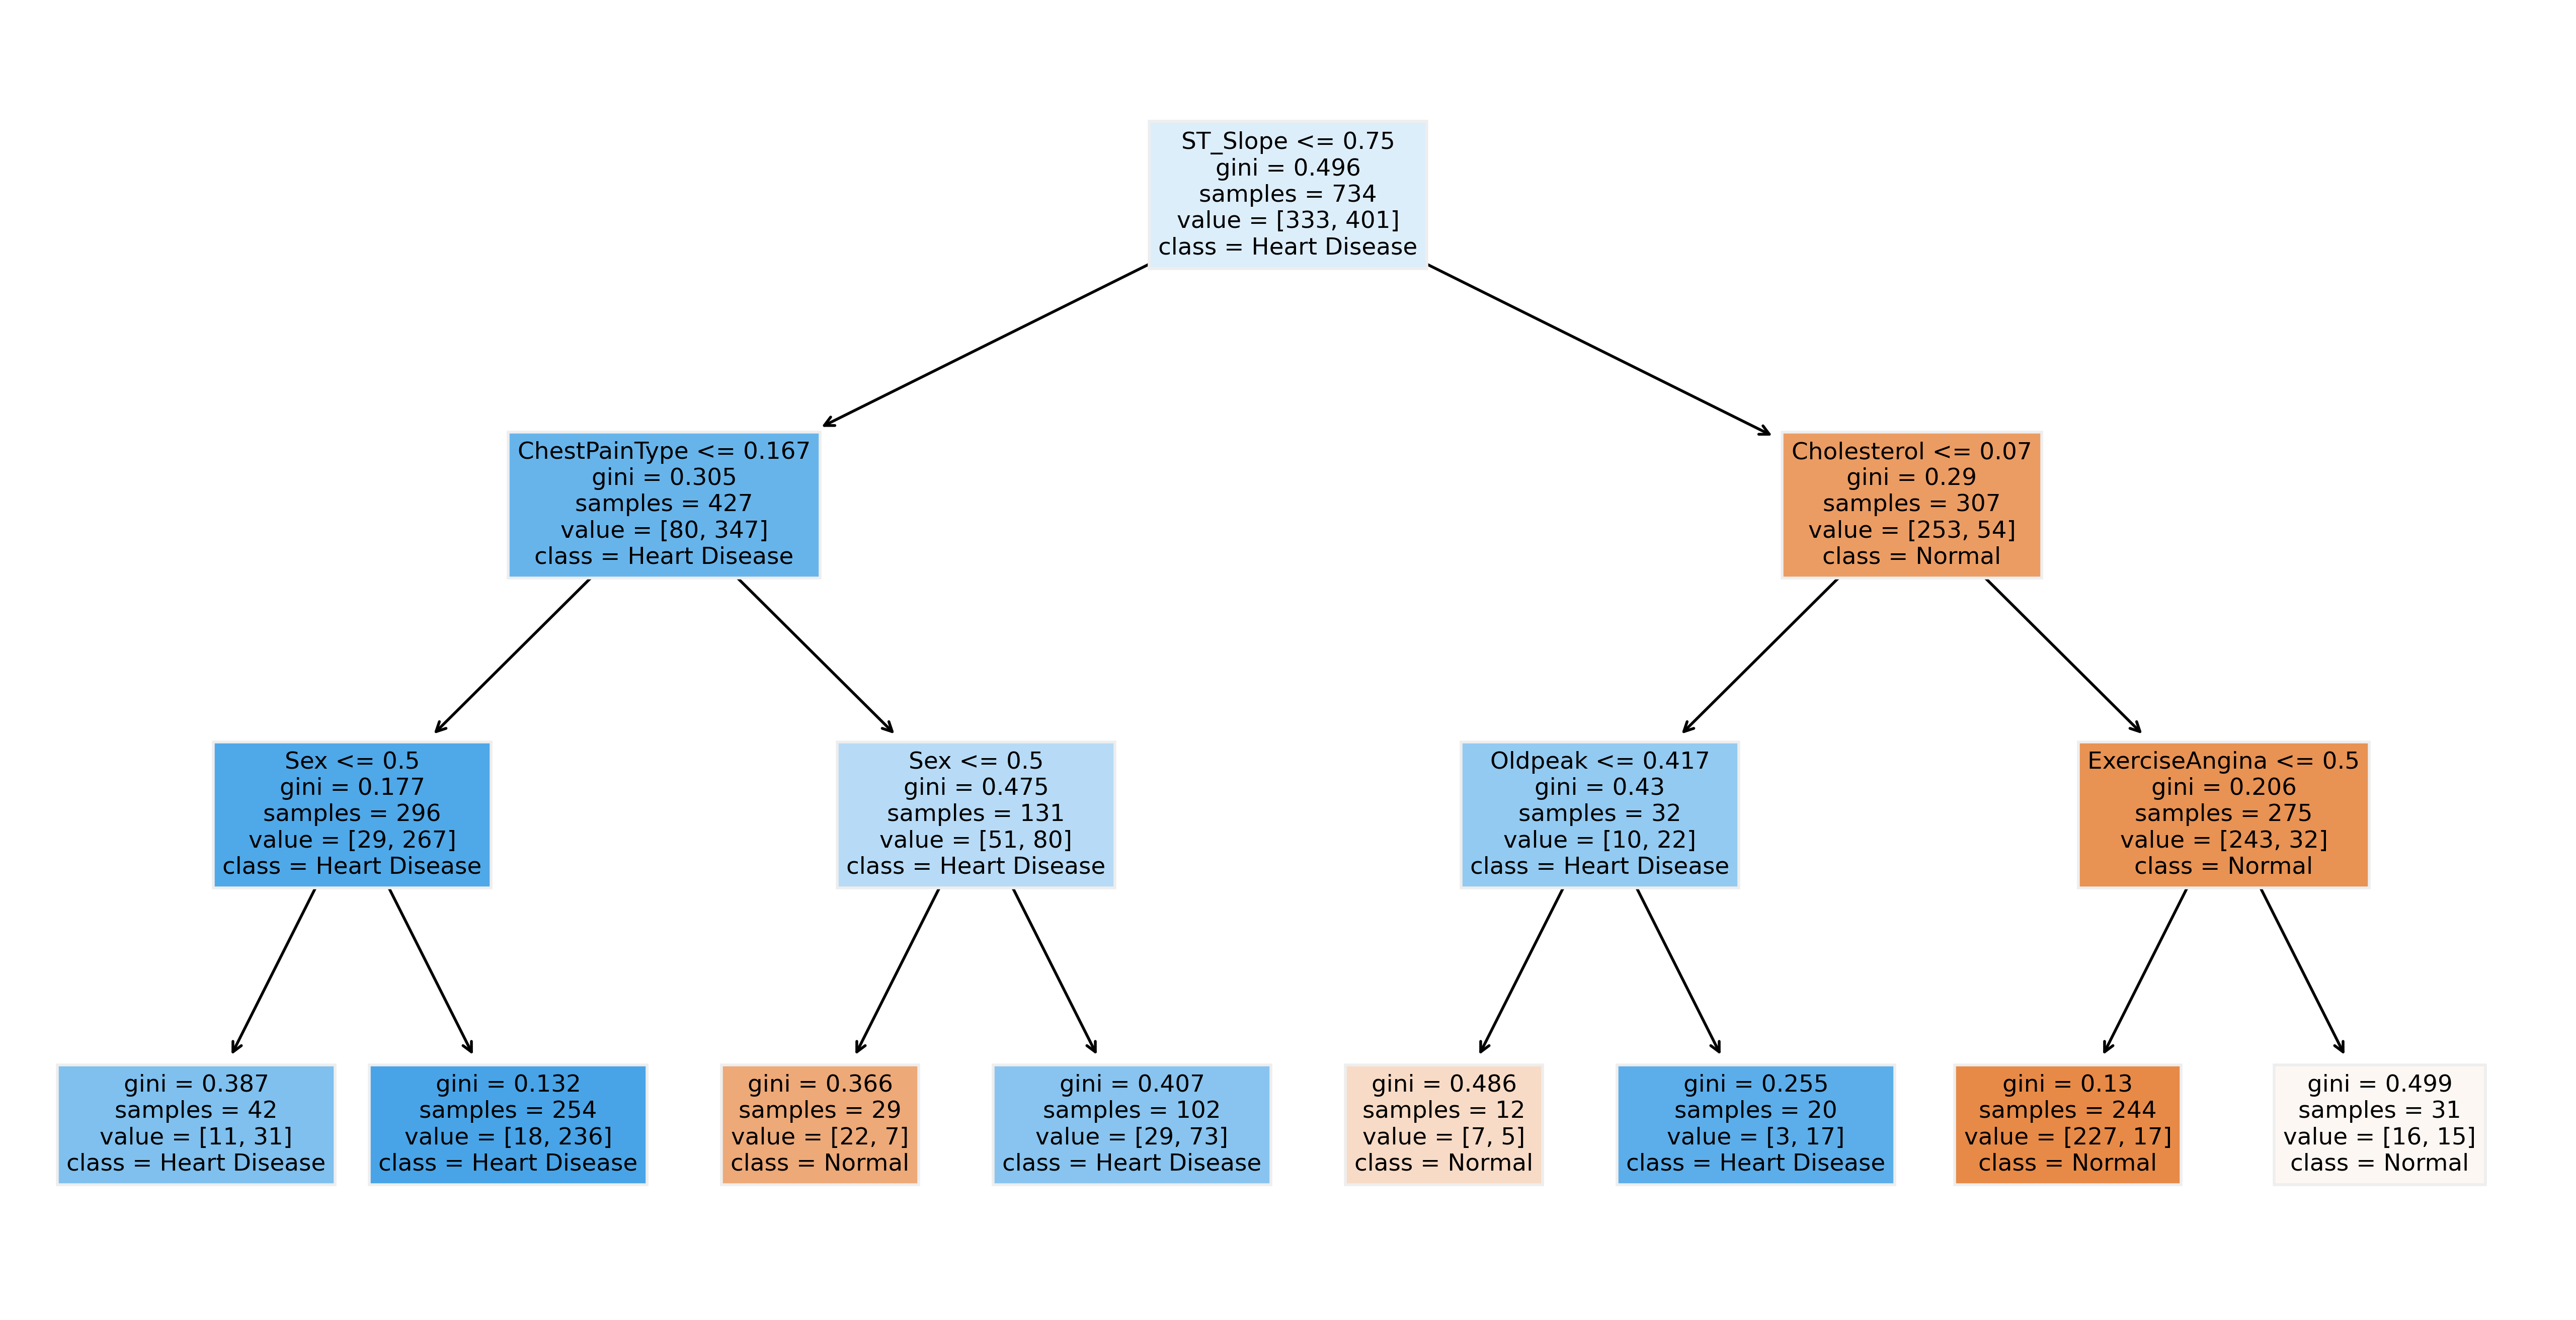

In [24]:
fig = plt.figure(figsize=(8,4), dpi=800)
tree.plot_tree(best_dt,
               feature_names=X.columns,
               class_names=['Normal', 'Heart Disease'],
               filled=True)

##4.2 Random Forest

Pembuatan model Random Forest dengan menerapkan GridSearchCV untuk menentukan parameter terbaik

In [25]:
rf_model = RandomForestClassifier(random_state=42, criterion='gini')

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_cv = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)
print(f"Random Forest Best Parameters: {rf_cv.best_params_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [26]:
best_rf = rf_cv.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [27]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (16,4), dpi=900)
for index in range(3):
    tree.plot_tree(best_rf.estimators_[index],
                   feature_names=X.columns,
                   class_names=['Normal', 'Heart Disease'],
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

Output hidden; open in https://colab.research.google.com to view.

#5.&nbsp;Model Evaluation

In [28]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
                annot_kws={'fontsize': 14}, linewidths=0.5, linecolor='grey')
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=16)
    plt.xticks(ticks=[0.5, 1.5], labels=['Predicted Negative', 'Predicted Positive'])
    plt.yticks(ticks=[0.5, 1.5], labels=['True Negative', 'True Positive'])
    plt.show()

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{model_name} Classification Report:")
    print(report)
    print(f"Accuracy score: {accuracy}")
    print(f"Precision score: {precision}")
    print(f"Recall score: {recall}")
    print(f"F1 score: {f1}")

    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, model_name)
    return {
        "report": report,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": cm
    }

##5.1 Decision Tree

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.86      0.81        77
         1.0       0.89      0.82      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184

Accuracy score: 0.8369565217391305
Precision score: 0.8888888888888888
Recall score: 0.822429906542056
F1 score: 0.8543689320388348


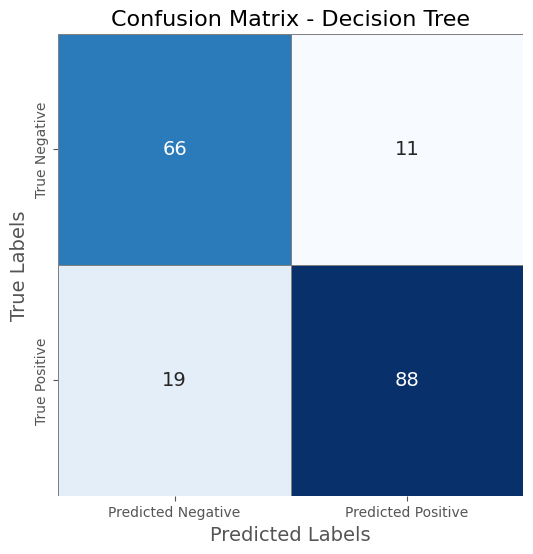

In [29]:
dt_results = evaluate_model(best_dt, X_test, y_test, model_name="Decision Tree")

##5.2 Random Forest

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84        77
         1.0       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

Accuracy score: 0.8641304347826086
Precision score: 0.9019607843137255
Recall score: 0.8598130841121495
F1 score: 0.8803827751196173


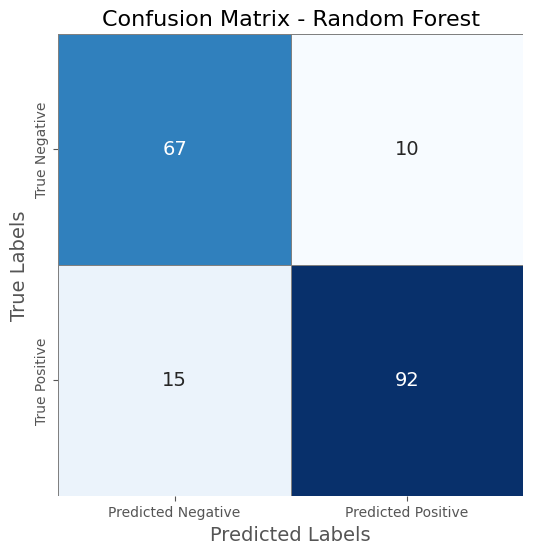

In [30]:
rf_results = evaluate_model(best_rf, X_test, y_test, model_name="Random Forest")

#6.&nbsp;Feature Importance

In [31]:
feature_index = X.loc[:, X.columns != 'HeartDisease']

##6.1 Decision Tree

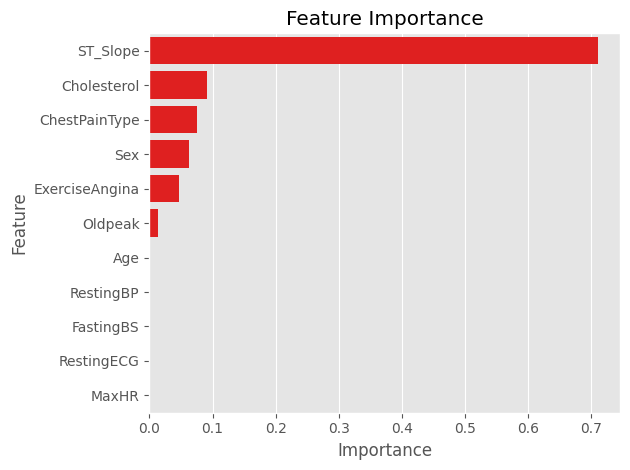

In [32]:
feature_importance_dt = best_dt.feature_importances_
feature_importance_dt = pd.Series(feature_importance_dt, index=feature_index.columns).sort_values(ascending=False)

sns.barplot(x=feature_importance_dt, y=feature_importance_dt.index, color='r')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

##6.2 Random Forest

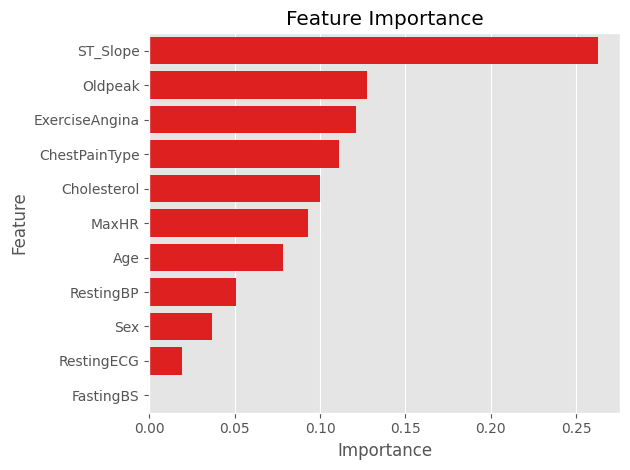

In [33]:
feature_importance_rf = best_rf.feature_importances_
feature_importance_rf = pd.Series(feature_importance_rf, index=feature_index.columns).sort_values(ascending=False)

sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index, color='r')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()